In [1]:
# import libraries for vizual
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read data
df = pd.read_csv('WinnipegDataset.txt')

In [4]:
df.head()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


In [5]:
df.describe()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
count,325834.000000,325834.000000,325834.000000,325834.000000,325834.00000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,...,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000,325834.000000
mean,4.062421,-15.143602,-24.026035,-15.400034,-18.59383,-14.493472,-18.427329,0.256432,-8.882434,-8.626002,...,0.433834,0.329085,2.171177,0.080138,0.919604,0.174447,0.162900,0.403288,0.764646,0.667567
std,1.604617,3.504255,4.054214,3.267857,3.71163,3.189013,3.675741,1.682060,1.204040,2.002658,...,0.245857,0.442008,1.284653,0.182628,0.105953,0.373726,0.222008,0.480141,0.273847,0.471260
min,1.000000,-23.971000,-34.308000,-23.161000,-27.24500,-22.103000,-26.897000,-5.582600,-16.389000,-16.558000,...,0.111110,-1.000000,0.000000,0.000000,0.106190,0.000000,0.000000,-0.000000,0.111110,-1.000000
25%,3.000000,-17.848000,-27.119000,-17.563000,-21.44900,-16.989000,-21.450000,-1.037800,-9.658500,-10.070000,...,0.259260,0.000000,1.000000,0.000000,0.833330,0.000000,0.000000,0.000000,0.506170,0.357140
50%,4.000000,-15.992000,-25.064000,-16.164000,-19.58800,-15.099000,-19.282000,0.309180,-8.915900,-8.733100,...,0.358020,0.357140,2.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,1.000000,1.000000
75%,6.000000,-11.786000,-20.387000,-13.427000,-15.65000,-11.735000,-15.514000,1.558200,-8.190200,-7.158100,...,0.506170,0.661440,3.000000,0.172840,1.000000,0.333330,0.333330,0.848690,1.000000,1.000000
max,7.000000,2.535600,-7.589100,1.104000,0.77491,-0.887390,0.951780,7.029900,-1.175400,-0.924610,...,1.000000,1.000000,12.444000,25.951000,1.000000,66.667000,6.666700,2.197200,1.000000,1.000000


Text(0.5, 1.0, 'Target distribution')

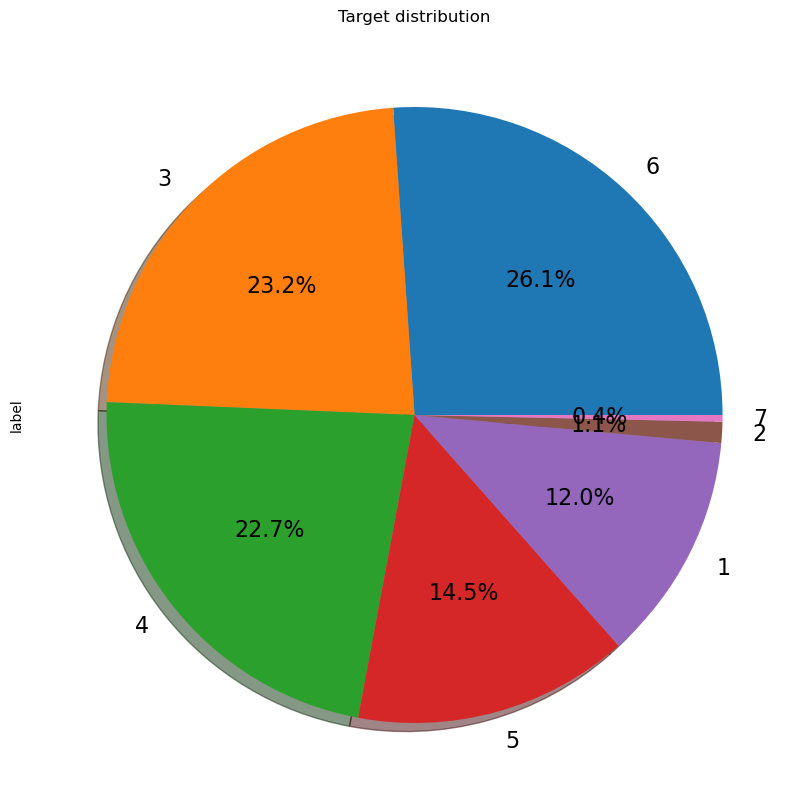

In [55]:
# Figure size
plt.figure(figsize=(10,10))

# Pie plot
df['label'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title('Target distribution')

Check missing values.
This code taken from [ Stack Overflow forum](https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251)

In [7]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ('Your selected dataframe has ' + str(df.shape[1]) + ' columns.\n'
        'There are ' + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [8]:
missing_values_table(df)

Your selected dataframe has 175 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


No missing values found


Check the features that are highly correlated with each other

The Code below taken from [here](https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on/43104383#43104383) and remove highly intercorrelated features

In [9]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(f'Deleted {len(to_drop)} highly intercorrelated features')

# Drop features
df.drop(to_drop, axis=1, inplace=True)

Deleted 72 highly intercorrelated features


In [10]:
df.shape

(325834, 103)

Check correlation between target and features

In [11]:
correlations = df.corr()['label'].sort_values()

In [12]:
print(correlations.head(15))
print(correlations.tail(15))

f51    -0.802949
f50    -0.794711
f3     -0.748987
f4     -0.726806
f52    -0.714201
f25    -0.713862
f26    -0.663247
f74    -0.659071
f75    -0.648984
f1     -0.644986
f43    -0.606849
f44    -0.603654
f115   -0.584561
f76    -0.573173
f27    -0.557992
Name: label, dtype: float64
f139     0.182372
f70      0.195602
f110     0.207356
f106     0.207985
f29      0.212543
f104     0.269889
f31      0.286312
f59      0.322921
f80      0.327757
f105     0.336893
f11      0.369601
f12      0.373625
f82      0.376146
f78      0.431513
label    1.000000
Name: label, dtype: float64


Segregating train and test sets.

I will use the one-vs-all, so I binarize the target

In [17]:
# import lib for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Separate out the features and targets
features = df.drop(columns='label')
targets = pd.DataFrame(df['label'])

y = label_binarize(targets, classes=[1, 2, 3, 4, 5, 6, 7])

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(228083, 102)
(97751, 102)
(228083, 7)
(97751, 7)


# **Modeling**

In [18]:
# import libraries for vizualiation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# import libraries for scalling, metric
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report

# import Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier


In [19]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# set target names for classification reports
target_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7']

In [22]:
log_reg = OneVsRestClassifier(LogisticRegression())
log_reg.fit(X_train,y_train)

log_reg_pred = log_reg.predict(X_test)

In [23]:
print('Accuracy LogReg:', round(accuracy_score(y_test, log_reg_pred), 2))
print('-' * 70)
print(classification_report(y_test, log_reg_pred, target_names=target_names))
print('-' * 70)
print(confusion_matrix(y_test.argmax(axis=1), log_reg_pred.argmax(axis=1)))

Accuracy LogReg: 0.98
----------------------------------------------------------------------
              precision    recall  f1-score   support

     class 1       0.99      0.99      0.99     11777
     class 2       1.00      1.00      1.00      1095
     class 3       1.00      1.00      1.00     22738
     class 4       0.99      0.99      0.99     22229
     class 5       0.97      0.94      0.96     14054
     class 6       0.98      0.98      0.98     25526
     class 7       0.93      0.95      0.94       332

   micro avg       0.99      0.98      0.98     97751
   macro avg       0.98      0.98      0.98     97751
weighted avg       0.99      0.98      0.98     97751
 samples avg       0.98      0.98      0.98     97751

----------------------------------------------------------------------
[[11710     0    17    34     7     2     7]
 [    2  1093     0     0     0     0     0]
 [   82     1 22639     3     3    10     0]
 [  145     1    20 21998    41    24     0]
 [  4

In [24]:
knn = OneVsRestClassifier(KNeighborsClassifier())
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

In [25]:
print('Accuracy KNN:', round(accuracy_score(y_test, knn_pred), 2))
print('-' * 70)
print(classification_report(y_test, knn_pred, target_names=target_names))
print('-' * 70)
print(confusion_matrix(y_test.argmax(axis=1), knn_pred.argmax(axis=1)))

Accuracy KNN: 1.0
----------------------------------------------------------------------
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00     11777
     class 2       0.99      1.00      1.00      1095
     class 3       1.00      1.00      1.00     22738
     class 4       1.00      1.00      1.00     22229
     class 5       0.99      0.99      0.99     14054
     class 6       1.00      1.00      1.00     25526
     class 7       0.95      0.96      0.95       332

   micro avg       1.00      1.00      1.00     97751
   macro avg       0.99      0.99      0.99     97751
weighted avg       1.00      1.00      1.00     97751
 samples avg       1.00      1.00      1.00     97751

----------------------------------------------------------------------
[[11739     2     7    14     3     4     8]
 [    2  1093     0     0     0     0     0]
 [   15     3 22705     6     2     7     0]
 [   23     1     8 22170    20     7     0]
 [   25  

In [26]:
svc = OneVsRestClassifier(SVC(random_state=42))
svc.fit(X_train,y_train)

svc_pred = svc.predict(X_test)

In [27]:
print('Accuracy SVC:', round(accuracy_score(y_test, svc_pred), 2))
print('-' * 70)
print(classification_report(y_test, svc_pred, target_names=target_names))
print('-' * 70)
print(confusion_matrix(y_test.argmax(axis=1), svc_pred.argmax(axis=1)))

Accuracy SVC: 0.99
----------------------------------------------------------------------
              precision    recall  f1-score   support

     class 1       1.00      0.99      1.00     11777
     class 2       1.00      0.99      1.00      1095
     class 3       1.00      1.00      1.00     22738
     class 4       1.00      1.00      1.00     22229
     class 5       1.00      0.99      0.99     14054
     class 6       1.00      1.00      1.00     25526
     class 7       0.96      0.86      0.90       332

   micro avg       1.00      0.99      1.00     97751
   macro avg       0.99      0.97      0.98     97751
weighted avg       1.00      0.99      1.00     97751
 samples avg       0.99      0.99      0.99     97751

----------------------------------------------------------------------
[[11749     0    11    10     0     0     7]
 [    8  1087     0     0     0     0     0]
 [   37     0 22697     0     0     4     0]
 [   46     0    11 22146    23     3     0]
 [   90 

## Tuning

In [28]:
#  Logistic Regression
log_reg = OneVsRestClassifier(LogisticRegression(random_state=10))
log_reg_params = {"estimator__penalty": ['l1', 'l2'],
                  'estimator__C': [0.001, 0.01, 0.1, 1, 10]
                 }
log_reg_tuning = RandomizedSearchCV(estimator=log_reg, param_distributions=log_reg_params, cv=4, scoring='f1_macro')
log_reg_tuning.fit(X_train, y_train)
# Get the logistic regression with the best parameters.
log_reg = log_reg_tuning.best_estimator_

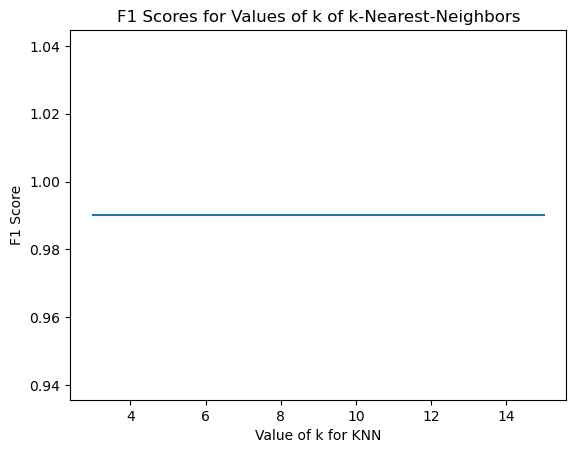

In [29]:
# experimenting with different n values
k_range = [3, 7, 15]
scores = []
for k in k_range:
    knn = OneVsRestClassifier(KNeighborsClassifier())
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='macro'))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [32]:
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
knn.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(n_neighbors=3))

In [30]:
svc = OneVsRestClassifier(SVC(C=0.5, kernel='rbf'))
svc.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=0.5))

Evaluate the results after hypertuning and save the f1 score for further comparison

In [33]:
log_reg_pred = log_reg.predict(X_test)

print(classification_report(y_test, log_reg_pred))
# save f1_score for compare models
log_reg_score = f1_score(y_test, log_reg_pred, average='macro')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11777
           1       1.00      1.00      1.00      1095
           2       1.00      1.00      1.00     22738
           3       0.99      0.99      0.99     22229
           4       0.97      0.94      0.96     14054
           5       0.98      0.98      0.98     25526
           6       0.93      0.95      0.94       332

   micro avg       0.99      0.98      0.98     97751
   macro avg       0.98      0.98      0.98     97751
weighted avg       0.99      0.98      0.98     97751
 samples avg       0.98      0.98      0.98     97751



In [34]:
knn_pred = knn.predict(X_test)

print(classification_report(y_test, knn_pred))
# save f1_score for compare models
knn_score = f1_score(y_test, knn_pred, average='macro')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11777
           1       1.00      1.00      1.00      1095
           2       1.00      1.00      1.00     22738
           3       1.00      1.00      1.00     22229
           4       0.99      0.99      0.99     14054
           5       1.00      1.00      1.00     25526
           6       0.96      0.97      0.96       332

   micro avg       1.00      1.00      1.00     97751
   macro avg       0.99      0.99      0.99     97751
weighted avg       1.00      1.00      1.00     97751
 samples avg       1.00      1.00      1.00     97751



In [35]:
svc_pred = svc.predict(X_test)

print(classification_report(y_test, svc_pred))
# save f1_score for compare models
svc_score = f1_score(y_test, svc_pred, average='macro')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11777
           1       1.00      0.98      0.99      1095
           2       1.00      1.00      1.00     22738
           3       1.00      0.99      1.00     22229
           4       0.99      0.99      0.99     14054
           5       1.00      0.99      1.00     25526
           6       0.94      0.79      0.86       332

   micro avg       1.00      0.99      0.99     97751
   macro avg       0.99      0.96      0.98     97751
weighted avg       1.00      0.99      0.99     97751
 samples avg       0.99      0.99      0.99     97751



Visualize Precision-Recall curve and ROC for these models

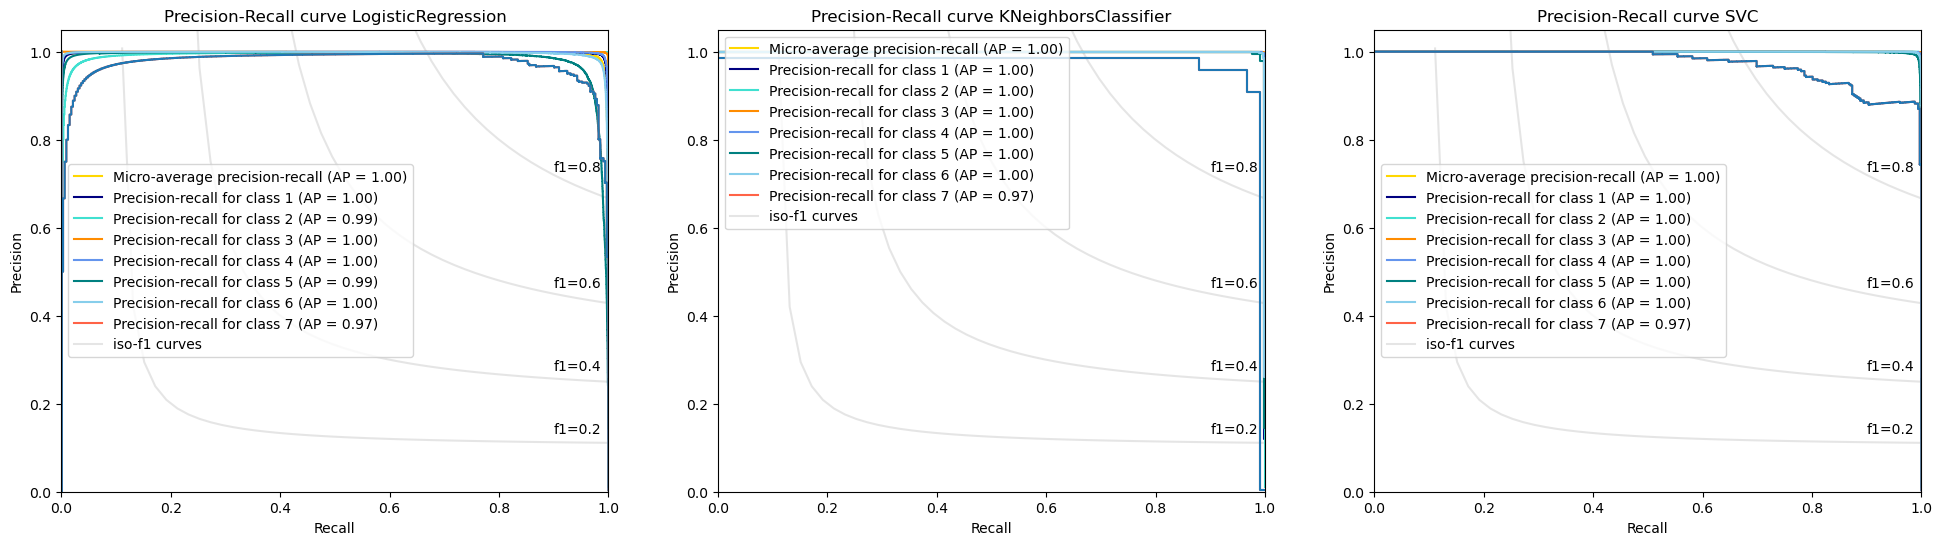

In [36]:
# import libraries for vizual ROC-AUC and PR-curve
from itertools import cycle
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier

n_classes = 7

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(24, 6))

classifiers = {
     ax1: log_reg,
     ax2: knn,
     ax3: svc
     }

# for ax in axes:
for clf_ax, classifier in classifiers.items():

    # start!
    if classifier == knn:
        y_score = classifier.predict_proba(X_test)
    else:
        y_score = classifier.decision_function(X_test)

    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(
        y_test.ravel(), y_score.ravel()
    )
    average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")

    # setup plot details
    colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "skyblue", "tomato"])

    f_scores = np.linspace(0.2, 0.8, num=4)
    lines, labels = [], []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        (l,) = clf_ax.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
        clf_ax.annotate(f"f1={f_score:.1f}", xy=(0.9, y[45] + 0.02))


    display = PrecisionRecallDisplay(
        recall=recall["micro"],
        precision=precision["micro"],
        average_precision=average_precision["micro"],
    )
    display.plot(ax=clf_ax, name="Micro-average precision-recall", color="gold")

    for i, color in zip(range(n_classes), colors):
        display = PrecisionRecallDisplay(
            recall=recall[i],
            precision=precision[i],
            average_precision=average_precision[i],
        )
        display.plot(ax=clf_ax, name=f"Precision-recall for class {i+1}", color=color)

    # add the legend for the iso-f1 curves
    handles, labels = display.ax_.get_legend_handles_labels()
    handles.extend([l])
    labels.extend(["iso-f1 curves"])
    display.plot(ax=clf_ax)

    # set the legend and the axes
    clf_ax.set_xlim([0.0, 1.0])
    clf_ax.set_ylim([0.0, 1.05])
    clf_ax.legend(handles=handles, labels=labels, loc="best")
    clf_ax.set_title(f"Precision-Recall curve {classifier.estimator.__class__.__name__}")

plt.show()

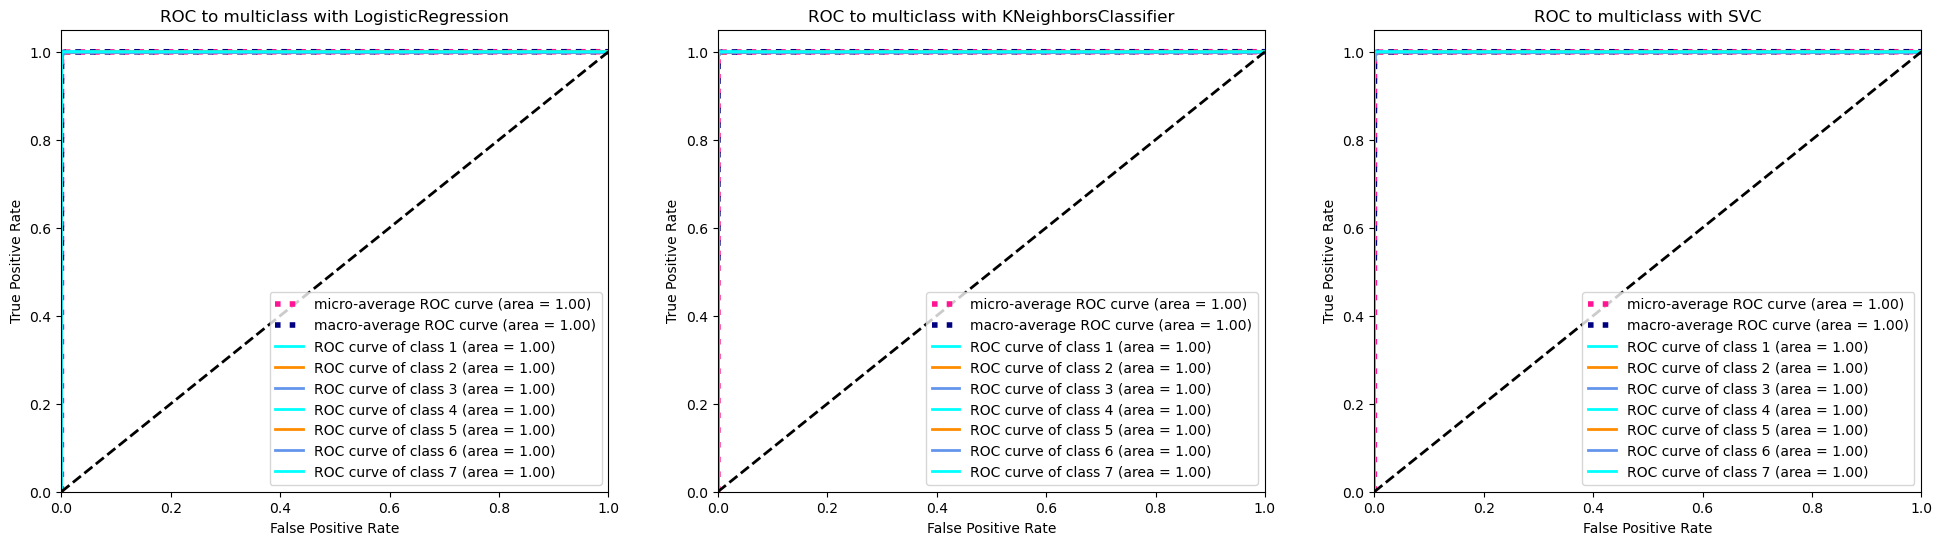

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(24, 6))

classifiers = {
     ax1: log_reg,
     ax2: knn,
     ax3: svc
}

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
for clf_ax, classifier in classifiers.items():
    clf_ax.plot(
      fpr["micro"],
      tpr["micro"],
      label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
      color="deeppink",
      linestyle=":",
      linewidth=4,
  )

    clf_ax.plot(
      fpr["macro"],
      tpr["macro"],
      label=f'macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
      color="navy",
      linestyle=":",
      linewidth=4,
  )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        clf_ax.plot(
          fpr[i],
          tpr[i],
          color=color,
          lw=lw,
          label=f"ROC curve of class {i+1} (area = {roc_auc[i]:.2f})",
      )

    clf_ax.plot([0, 1], [0, 1], "k--", lw=lw)
    clf_ax.set_xlim([0.0, 1.0])
    clf_ax.set_ylim([0.0, 1.05])
    clf_ax.set_xlabel("False Positive Rate")
    clf_ax.set_ylabel("True Positive Rate")
    clf_ax.set_title(f"ROC to multiclass with {classifier.estimator.__class__.__name__}")
    clf_ax.legend(loc="lower right")
plt.show()

# **ensemble**

In [40]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

In [41]:
# RandomForestClassifier
rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100,
                                                      min_samples_split=5,
                                                      min_samples_leaf=2,
                                                      max_features='sqrt',
                                                      criterion='entropy',
                                                      random_state=10))
rf.fit(X_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     random_state=10))

In [42]:
rf_pred = rf.predict(X_test)
# Save f1_score for compare models
rf_score = f1_score(y_test, rf_pred, average='macro')

print(classification_report(y_test, rf_pred, target_names=target_names))
print('-' * 70)
print(confusion_matrix(y_test.argmax(axis=1), rf_pred.argmax(axis=1)))

              precision    recall  f1-score   support

     class 1       1.00      0.99      1.00     11777
     class 2       1.00      0.99      1.00      1095
     class 3       1.00      1.00      1.00     22738
     class 4       1.00      0.99      1.00     22229
     class 5       1.00      0.98      0.99     14054
     class 6       1.00      0.99      1.00     25526
     class 7       0.95      0.95      0.95       332

   micro avg       1.00      0.99      1.00     97751
   macro avg       0.99      0.99      0.99     97751
weighted avg       1.00      0.99      1.00     97751
 samples avg       0.99      0.99      0.99     97751

----------------------------------------------------------------------
[[11747     0     9    15     0     0     6]
 [    9  1086     0     0     0     0     0]
 [   58     0 22672     4     0     4     0]
 [   94     0    13 22092    17    13     0]
 [  151     0     4    14 13826    54     5]
 [  125     0     1    10    29 25359     2]
 [   15 

In [43]:
# XGBClassifier
xgb = OneVsRestClassifier(XGBClassifier(n_estimators=100,
                                        learning_rate=0.1,
                                        max_depth=5,
                                        min_child_weight=0.9,
                                        random_state=10))
xgb.fit(X_train,y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=0.9, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=10, ...))

In [44]:
xgb_pred = xgb.predict(X_test)
# Save f1_score for compare models
xgb_score = f1_score(y_test, xgb_pred, average='macro')

print(classification_report(y_test, xgb_pred, target_names=target_names))
print('-' * 70)
print(confusion_matrix(y_test.argmax(axis=1), xgb_pred.argmax(axis=1)))

              precision    recall  f1-score   support

     class 1       1.00      0.99      1.00     11777
     class 2       1.00      0.99      1.00      1095
     class 3       1.00      1.00      1.00     22738
     class 4       1.00      0.99      0.99     22229
     class 5       0.99      0.98      0.98     14054
     class 6       0.99      0.99      0.99     25526
     class 7       0.95      0.96      0.95       332

   micro avg       0.99      0.99      0.99     97751
   macro avg       0.99      0.99      0.99     97751
weighted avg       0.99      0.99      0.99     97751
 samples avg       0.99      0.99      0.99     97751

----------------------------------------------------------------------
[[11752     0     3    16     0     1     5]
 [    7  1087     0     1     0     0     0]
 [   47     0 22679     6     1     5     0]
 [   94     1    17 22074    26    17     0]
 [  195     0     6    26 13736    86     5]
 [  182     0     5    20    93 25223     3]
 [   16 

Compare all models and choose the best

In [45]:

results = pd.DataFrame({
    'Model': ['KNN',
              'Logistic Regression',
              'Random Forest',
              'Support Vector Machine',
              'XGBoost'],
    'Score': [knn_score,
              log_reg_score,
              rf_score,
              svc_score,
              xgb_score,]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(10)

,Model,Score
0,KNN,0.991862
1,Random Forest,0.989432
2,XGBoost,0.987667
3,Logistic Regression,0.978949
4,Support Vector Machine,0.975120
